In [120]:
import warnings
warnings.filterwarnings('ignore')

# You can safely ignore any warnings on importing this
from fbprophet import Prophet

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('featured_data.csv', index_col='time')
df.index = pd.to_datetime(df.index)
df.head(5)

Haftwert  Gleitwert  Quality  order_number  \
time                                                              
2018-01-11 22:44:12  1.976542   2.569658      1.0        161658   
2018-01-11 22:44:12  2.332450   2.415492      1.0        161659   
2018-01-12 14:17:09  2.440000   2.527775      1.0        161670   
2018-01-12 16:29:06  2.746358   3.078017      1.0        161671   
2018-01-12 17:43:33  2.331950   2.118992      1.0        161675   

                     delta_badmean_30_30  delta_goodmean_30_30  \
time                                                             
2018-01-11 22:44:12             0.018889              0.496667   
2018-01-11 22:44:12             0.018889              0.496667   
2018-01-12 14:17:09             0.462778              0.755000   
2018-01-12 16:29:06             0.066667              1.286667   
2018-01-12 17:43:33             0.086111              2.867222   

                     delta_tunnelmean_30_30  delta_druck_silokonmean_30_30  \
time                                                                         
2018-01-11 22:44:12                0.000000                      -0.000031   
2018-01-11 22:44:12                0.000000                      -0.000031   
2018-01-12 14:17:09                0.000000                       0.000017   
2018-01-12 16:29:06                0.065556                       0.000006   
2018-01-12 17:43:33                0.063889                       0.000004   

                     delta_heiß_1mean_30_30  \
time                                          
2018-01-11 22:44:12                0.000048   
2018-01-11 22:44:12                0.000048   
2018-01-12 14:17:09                0.000000   
2018-01-12 16:29:06               -0.000072   
2018-01-12 17:43:33               -0.000289   

                     delta_druck_nach_silokonmean_30_30  \
time                                                      
2018-01-11 22:44:12                            0.000000   
2018-01-11 22:44:12                            0.000000   
2018-01-12 14:17:09                            0.000000   
2018-01-12 16:29:06                            0.000712   
2018-01-12 17:43:33                            0.000005   

                     delta_druck_sterilmean_30_30  \
time                                                
2018-01-11 22:44:12                      0.000000   
2018-01-11 22:44:12                      0.000000   
2018-01-12 14:17:09                      0.000000   
2018-01-12 16:29:06                      0.001179   
2018-01-12 17:43:33                      0.000006   

                     Tunnelbandgeschwindigkeitmean_30_30  \
time                                                       
2018-01-11 22:44:12                             2.798889   
2018-01-11 22:44:12                             2.798889   
2018-01-12 14:17:09                             3.110000   
2018-01-12 16:29:06                             9.805000   
2018-01-12 17:43:33                            17.293333   

                     Druck Silikonmean_30_30  \
time                                           
2018-01-11 22:44:12                 0.424860   
2018-01-11 22:44:12                 0.424860   
2018-01-12 14:17:09                 0.411647   
2018-01-12 16:29:06                 0.380270   
2018-01-12 17:43:33                 0.419236   

                     Ist- Temperatur Heissteil 1mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.087515   
2018-01-11 22:44:12                             290.087515   
2018-01-12 14:17:09                             290.319464   
2018-01-12 16:29:06                             290.050231   
2018-01-12 17:43:33                             290.267630   

                     Ist- Temperatur Heissteil 2mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.317969   
2018-01-11 22:44:12                           

INFO:matplotlib.font_manager:findfont: Found a missing font file.  Rebuilding cache.
INFO:matplotlib.font_manager:font search path ['/Users/maximilianstaebler/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/Users/maximilianstaebler/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/Users/maximilianstaebler/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:Could not open font file /System/Library/Fonts/Supplemental/NISC18030.ttf
INFO:matplotlib.font_manager:generated new fontManager


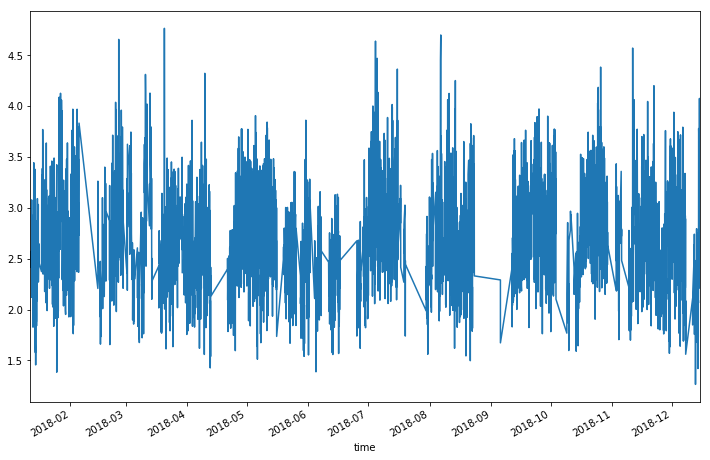

In [3]:
df['Gleitwert'].plot(figsize=(12,8))

In [4]:
param_set = df[['order_number', 'Haftwert', 'Gleitwert', 'Quality',
                 'Tunnelbandgeschwindigkeitmean_30_30', 'Druck Silikonmean_30_30',
                 'Ist- Temperatur Heissteil 1mean_30_30', 'Ist- Temperatur Heissteil 2mean_30_30',
                 'Ist- Temperatur Heissteil 3mean_30_30', 'Druck Sterilluft nach Silikonmean_30_30',
                 'Druck Sterilluftmean_30_30']]
param_set.head(5)

order_number  Haftwert  Gleitwert  Quality  \
time                                                              
2018-01-11 22:44:12        161658  1.976542   2.569658      1.0   
2018-01-11 22:44:12        161659  2.332450   2.415492      1.0   
2018-01-12 14:17:09        161670  2.440000   2.527775      1.0   
2018-01-12 16:29:06        161671  2.746358   3.078017      1.0   
2018-01-12 17:43:33        161675  2.331950   2.118992      1.0   

                     Tunnelbandgeschwindigkeitmean_30_30  \
time                                                       
2018-01-11 22:44:12                             2.798889   
2018-01-11 22:44:12                             2.798889   
2018-01-12 14:17:09                             3.110000   
2018-01-12 16:29:06                             9.805000   
2018-01-12 17:43:33                            17.293333   

                     Druck Silikonmean_30_30  \
time                                           
2018-01-11 22:44:12                 0.424860   
2018-01-11 22:44:12                 0.424860   
2018-01-12 14:17:09                 0.411647   
2018-01-12 16:29:06                 0.380270   
2018-01-12 17:43:33                 0.419236   

                     Ist- Temperatur Heissteil 1mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.087515   
2018-01-11 22:44:12                             290.087515   
2018-01-12 14:17:09                             290.319464   
2018-01-12 16:29:06                             290.050231   
2018-01-12 17:43:33                             290.267630   

                     Ist- Temperatur Heissteil 2mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.317969   
2018-01-11 22:44:12                             290.317969   
2018-01-12 14:17:09                             290.393500   
2018-01-12 16:29:06                             290.322356   
2018-01-12 17:43:33                             290.372740   

                     Ist- Temperatur Heissteil 3mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.214870   
2018-01-11 22:44:12                             290.214870   
2018-01-12 14:17:09                             290.107099   
2018-01-12 16:29:06                             290.216172   
2018-01-12 17:43:33                             290.109513   

                     Druck Sterilluft nach Silikonmean_30_30  \
time                                                           
2018-01-11 22:44:12                                 0.074777   
2018-01-11 22:44:12                                 0.074777   
2018-01-12 14:17:09                                 0.182095   
2018-01-12 16:29:06                                 0.197476   
2018-01-12 17:43:33                                 0.394710   

                     Druck Sterilluftmean_30_30  
time                                             
2018-01-11 22:44:12                    0.112432  
2018-01-11 22:44:12                    0.112432  
2018-01-12 14:17:09                    0.273353  
2018-01-12 16:29:06                    0.314246  
2018-01-12 17:43:33                    0.652778

In [8]:
type(param_set['Gleitwert'])

pandas.core.series.Series

In [9]:
results = seasonal_decompose(param_set['Gleitwert'], freq=12)

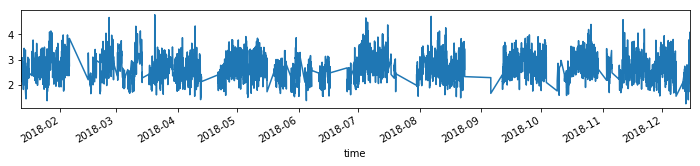

In [10]:
results.observed.plot(figsize=(12,2))

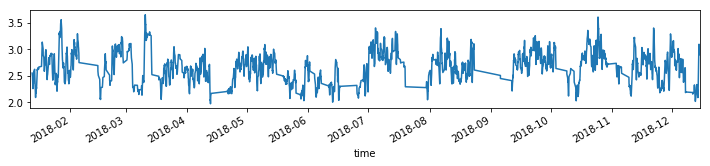

In [11]:
results.trend.plot(figsize=(12,2))

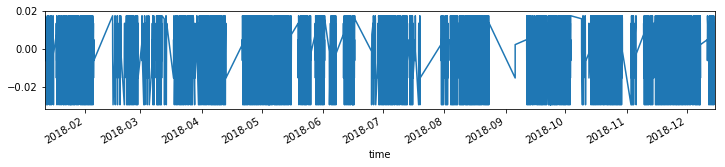

In [12]:
results.seasonal.plot(figsize=(12,2))

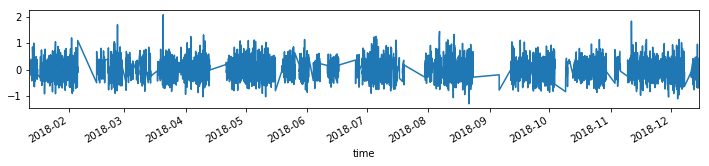

In [13]:
results.resid.plot(figsize=(12,2))

# Lets check for correelations and extract the real useful parameters

Currently the following columns can be used to predict the final value:

```python
['order_number', 'Haftwert', 'Gleitwert', 'Quality',
       'Tunnelbandgeschwindigkeitmean_30_30', 'Druck Silikonmean_30_30',
       'Ist- Temperatur Heissteil 1mean_30_30',
       'Ist- Temperatur Heissteil 2mean_30_30',
       'Ist- Temperatur Heissteil 3mean_30_30',
       'Druck Sterilluft nach Silikonmean_30_30',
       'Druck Sterilluftmean_30_30']
```

As just the *Gleiwert* is important to distinguish wether a test was good or bad we will use this as predictions column. 

In [14]:
param_set.columns

Index(['order_number', 'Haftwert', 'Gleitwert', 'Quality',
       'Tunnelbandgeschwindigkeitmean_30_30', 'Druck Silikonmean_30_30',
       'Ist- Temperatur Heissteil 1mean_30_30',
       'Ist- Temperatur Heissteil 2mean_30_30',
       'Ist- Temperatur Heissteil 3mean_30_30',
       'Druck Sterilluft nach Silikonmean_30_30',
       'Druck Sterilluftmean_30_30'],
      dtype='object')

In [15]:
pred_params = param_set.drop(['order_number', 'Haftwert', 'Quality'], axis=1)

In [16]:
pred_params.head(2)

Gleitwert  Tunnelbandgeschwindigkeitmean_30_30  \
time                                                                  
2018-01-11 22:44:12   2.569658                             2.798889   
2018-01-11 22:44:12   2.415492                             2.798889   

                     Druck Silikonmean_30_30  \
time                                           
2018-01-11 22:44:12                  0.42486   
2018-01-11 22:44:12                  0.42486   

                     Ist- Temperatur Heissteil 1mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.087515   
2018-01-11 22:44:12                             290.087515   

                     Ist- Temperatur Heissteil 2mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.317969   
2018-01-11 22:44:12                             290.317969   

                     Ist- Temperatur Heissteil 3mean_30_30  \
time                                                         
2018-01-11 22:44:12                              290.21487   
2018-01-11 22:44:12                              290.21487   

                     Druck Sterilluft nach Silikonmean_30_30  \
time                                                           
2018-01-11 22:44:12                                 0.074777   
2018-01-11 22:44:12                                 0.074777   

                     Druck Sterilluftmean_30_30  
time                                             
2018-01-11 22:44:12                    0.112432  
2018-01-11 22:44:12                    0.112432

In [17]:
pred_params.count()

Gleitwert                                  5065
Tunnelbandgeschwindigkeitmean_30_30        5065
Druck Silikonmean_30_30                    5065
Ist- Temperatur Heissteil 1mean_30_30      5065
Ist- Temperatur Heissteil 2mean_30_30      5065
Ist- Temperatur Heissteil 3mean_30_30      5065
Druck Sterilluft nach Silikonmean_30_30    5065
Druck Sterilluftmean_30_30                 5065
dtype: int64

In [18]:
import seaborn as sns

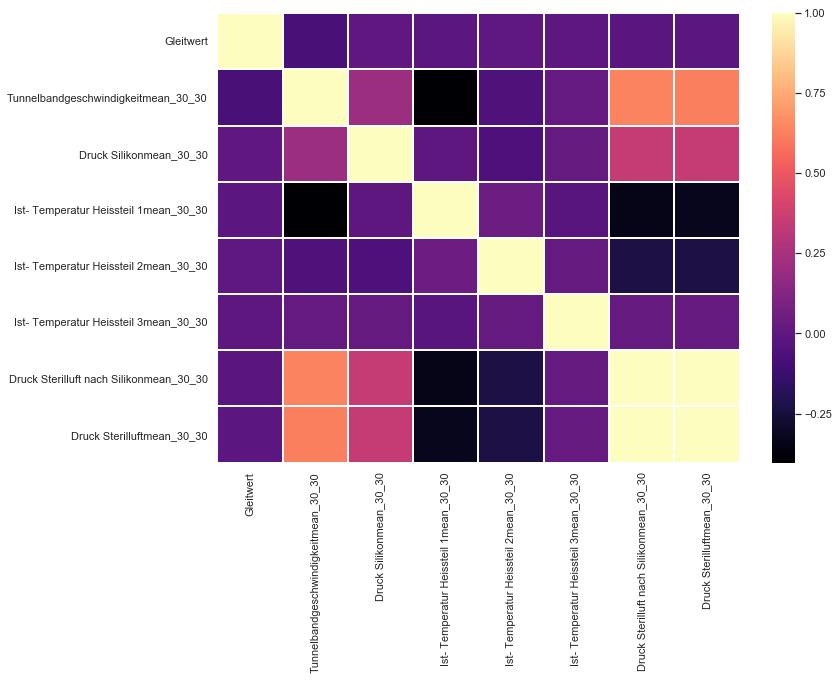

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pred_params.corr(),cmap='magma',linecolor='white',linewidths=1)

**There is a strong correlation between `Druck Sterilluft nach Silikonmean_30_30` and `Druck Sterilluftmean_30_30`. We will drop the latter.**

In [20]:
pred_params.drop('Druck Sterilluftmean_30_30', axis=1, inplace=True)

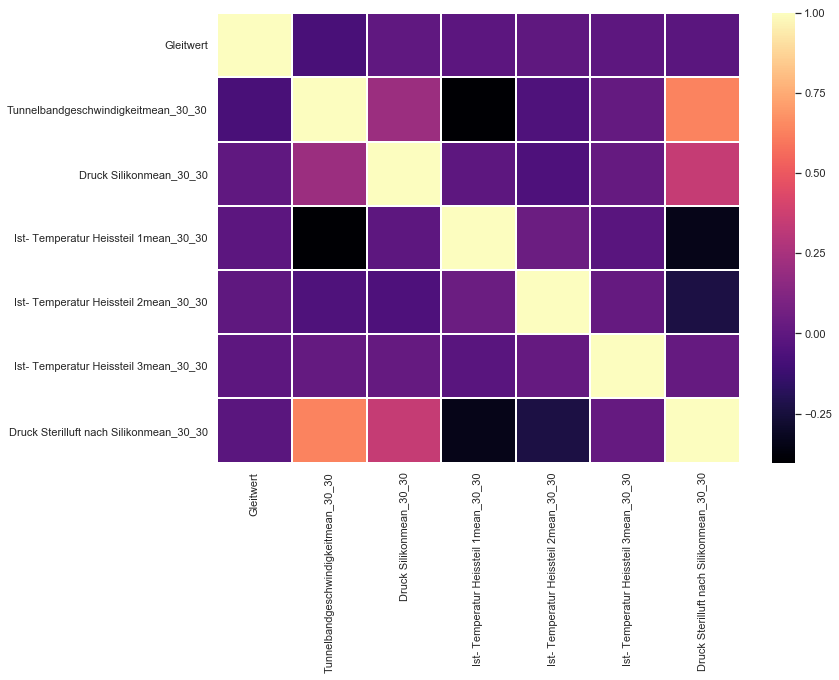

In [21]:
sns.heatmap(pred_params.corr(),cmap='magma',linecolor='white',linewidths=1)

**Correlations:**

- `Tunnelbandgeschwindigkeitmean_30_30` AND `Druck Sterilluft nach Silikonmean_30_3`
- `Tunnelbandgeschwindigkeitmean_30_30` AND `Ist- Temperatur Heissteil 1mean_30_30`
- `Ist- Temperatur Heissteil 1mean_30_30` AND `Druck Sterilluft nach Silikonmean_30_30`

As the correletaion is nowwhere too high we will keep all variables and pray to the mighty lords that they will give is some good results!

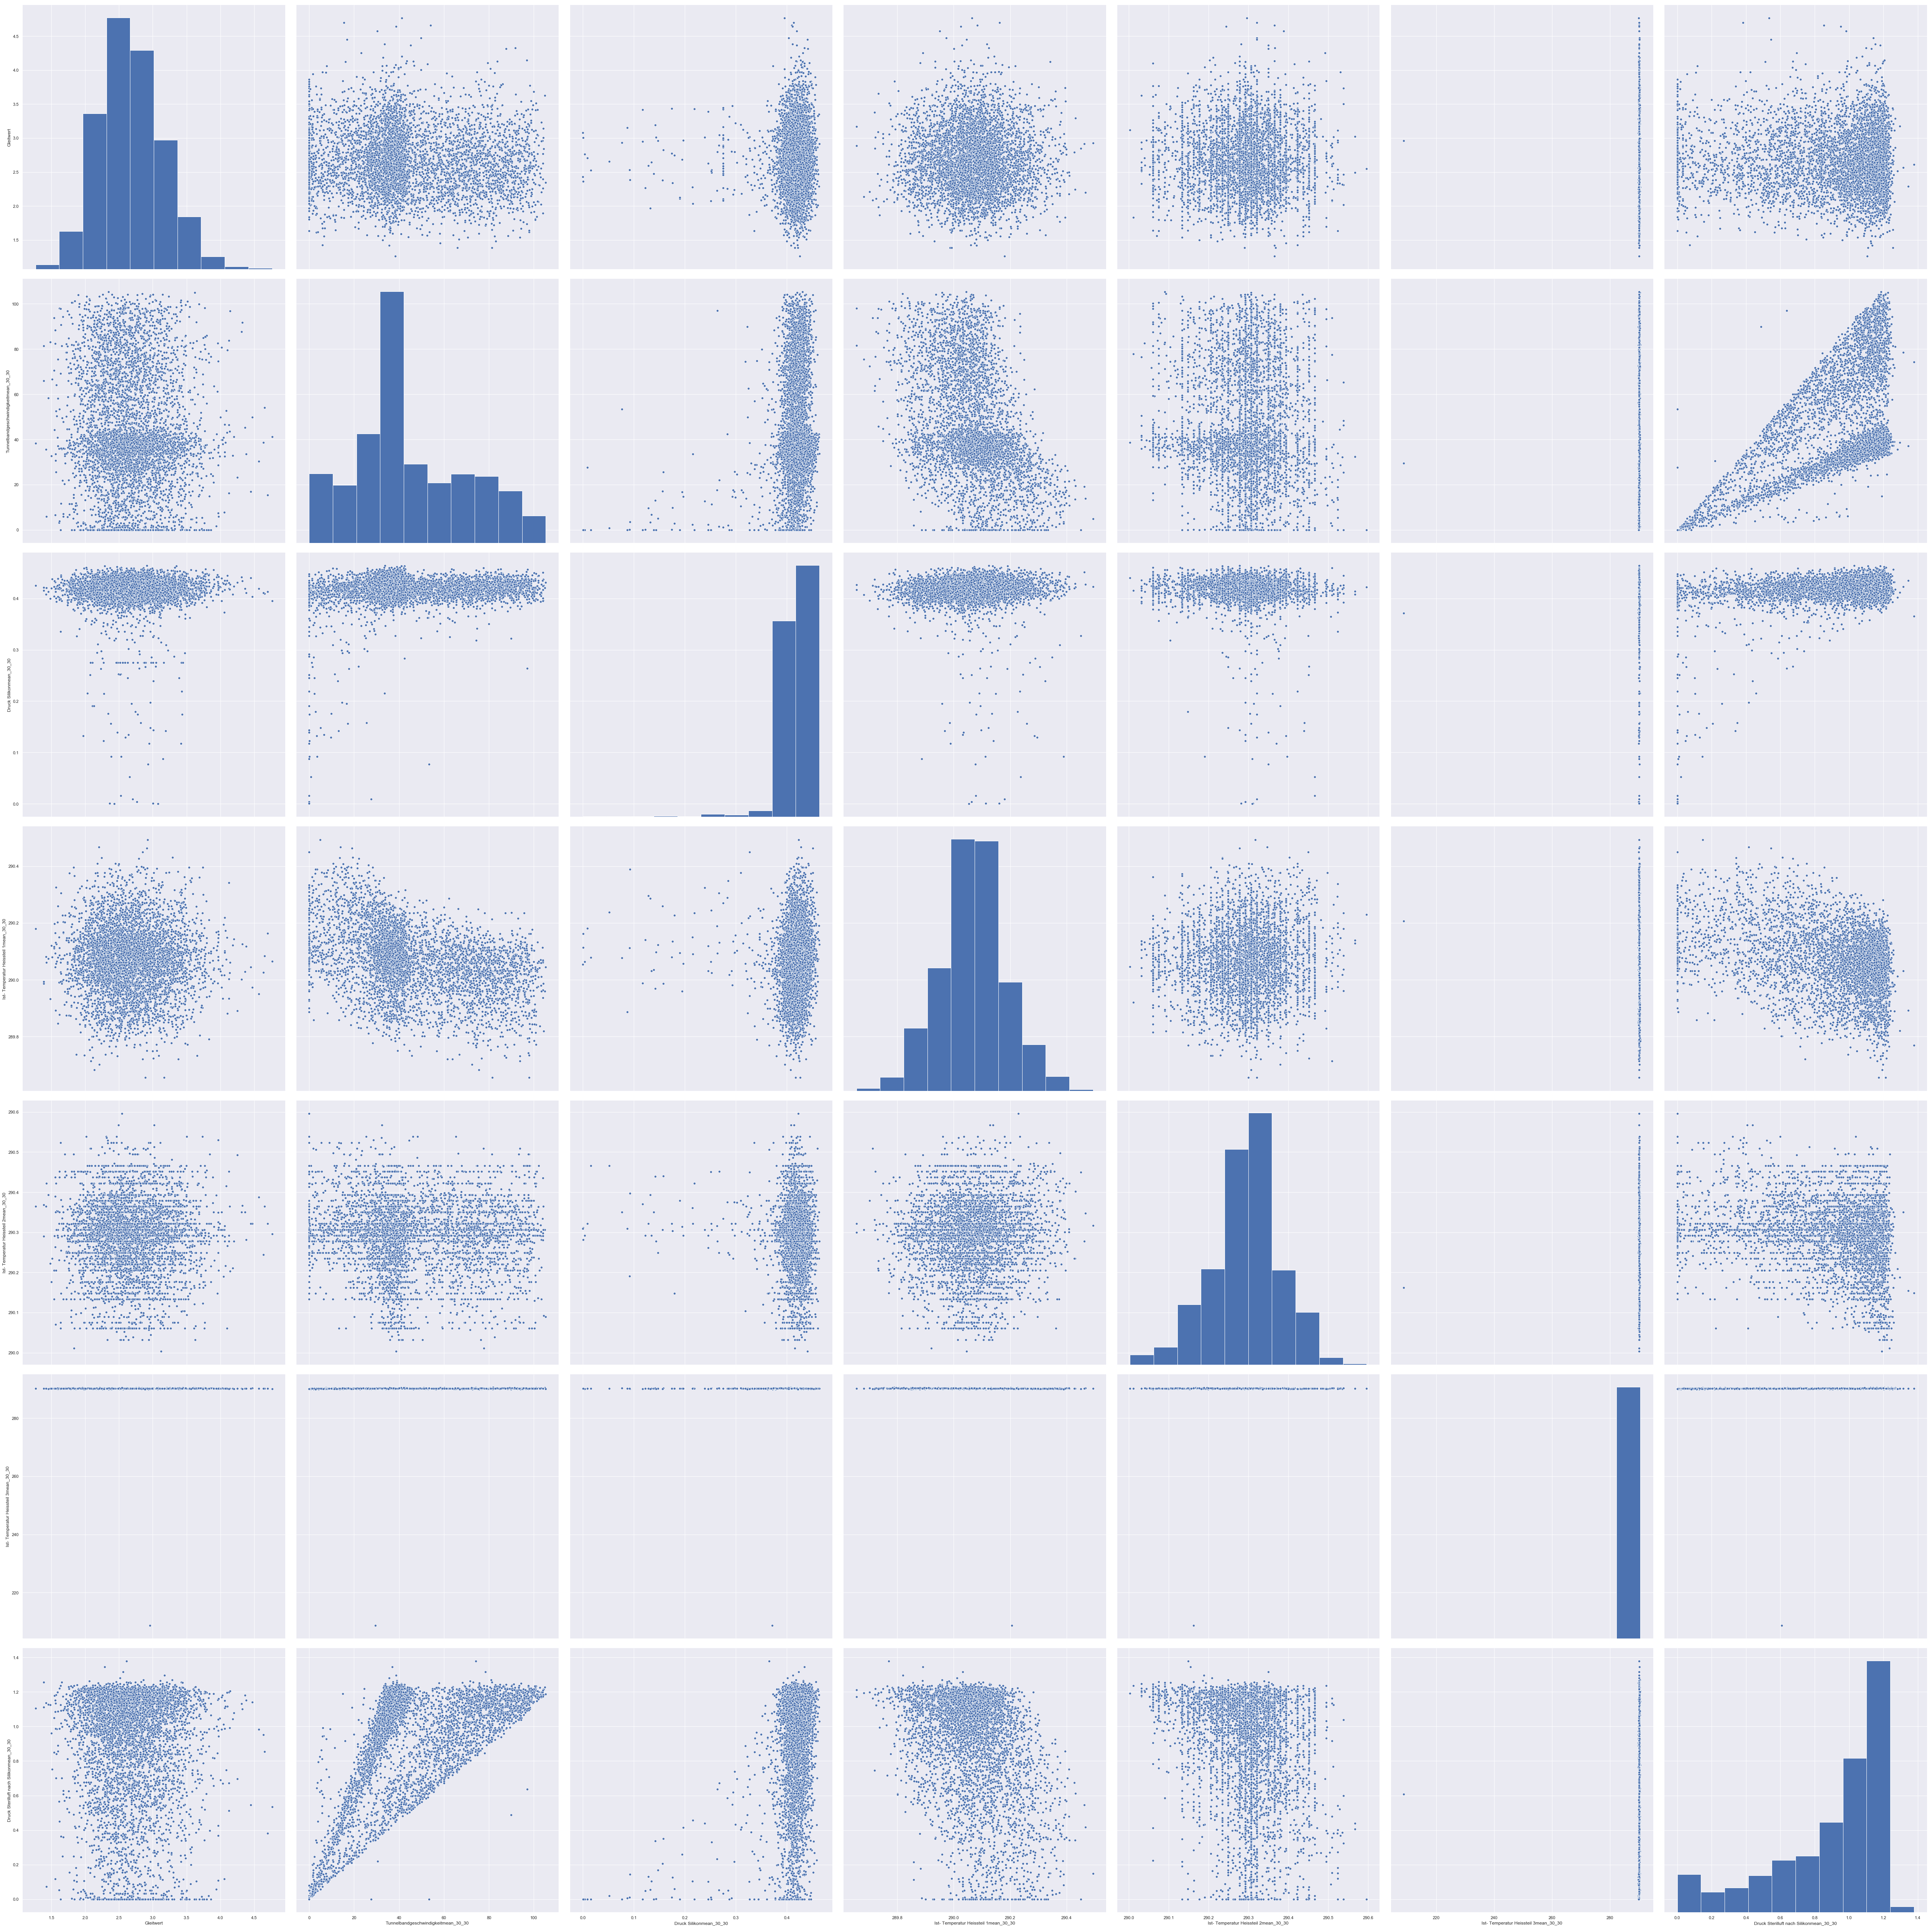

In [29]:
sns.set(rc={'figure.figsize':(24,18)})
sns.pairplot(pred_params, height=10, aspect=1, palette='magma')

# Create Linear Regression

In [30]:
df_feat = pred_params.drop('Gleitwert', axis=1)
df_target = pred_params['Gleitwert']

In [33]:
print(df_feat.info())
print(df_target)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5065 entries, 2018-01-11 22:44:12 to 2018-12-15 02:03:51
Data columns (total 6 columns):
Tunnelbandgeschwindigkeitmean_30_30        5065 non-null float64
Druck Silikonmean_30_30                    5065 non-null float64
Ist- Temperatur Heissteil 1mean_30_30      5065 non-null float64
Ist- Temperatur Heissteil 2mean_30_30      5065 non-null float64
Ist- Temperatur Heissteil 3mean_30_30      5065 non-null float64
Druck Sterilluft nach Silikonmean_30_30    5065 non-null float64
dtypes: float64(6)
memory usage: 437.0 KB
None
time
2018-01-11 22:44:12    2.569658
2018-01-11 22:44:12    2.415492
2018-01-12 14:17:09    2.527775
2018-01-12 16:29:06    3.078017
2018-01-12 17:43:33    2.118992
                         ...   
2018-12-14 22:00:11    4.076283
2018-12-14 22:49:30    2.542733
2018-12-14 23:37:19    2.279200
2018-12-15 00:43:05    2.790742
2018-12-15 02:03:51    2.882208
Name: Gleitwert, Length: 5065, dtype: float64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.4, random_state=101)

In [82]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
coeff_df = pd.DataFrame(lm.coef_,df_feat.columns,columns=['Coefficient'])
coeff_df

Coefficient
Tunnelbandgeschwindigkeitmean_30_30        -0.002849
Druck Silikonmean_30_30                    -0.006084
Ist- Temperatur Heissteil 1mean_30_30      -0.175388
Ist- Temperatur Heissteil 2mean_30_30       0.078425
Ist- Temperatur Heissteil 3mean_30_30      -0.003577
Druck Sterilluft nach Silikonmean_30_30     0.097165

In [84]:
predictions = lm.predict(X_test)

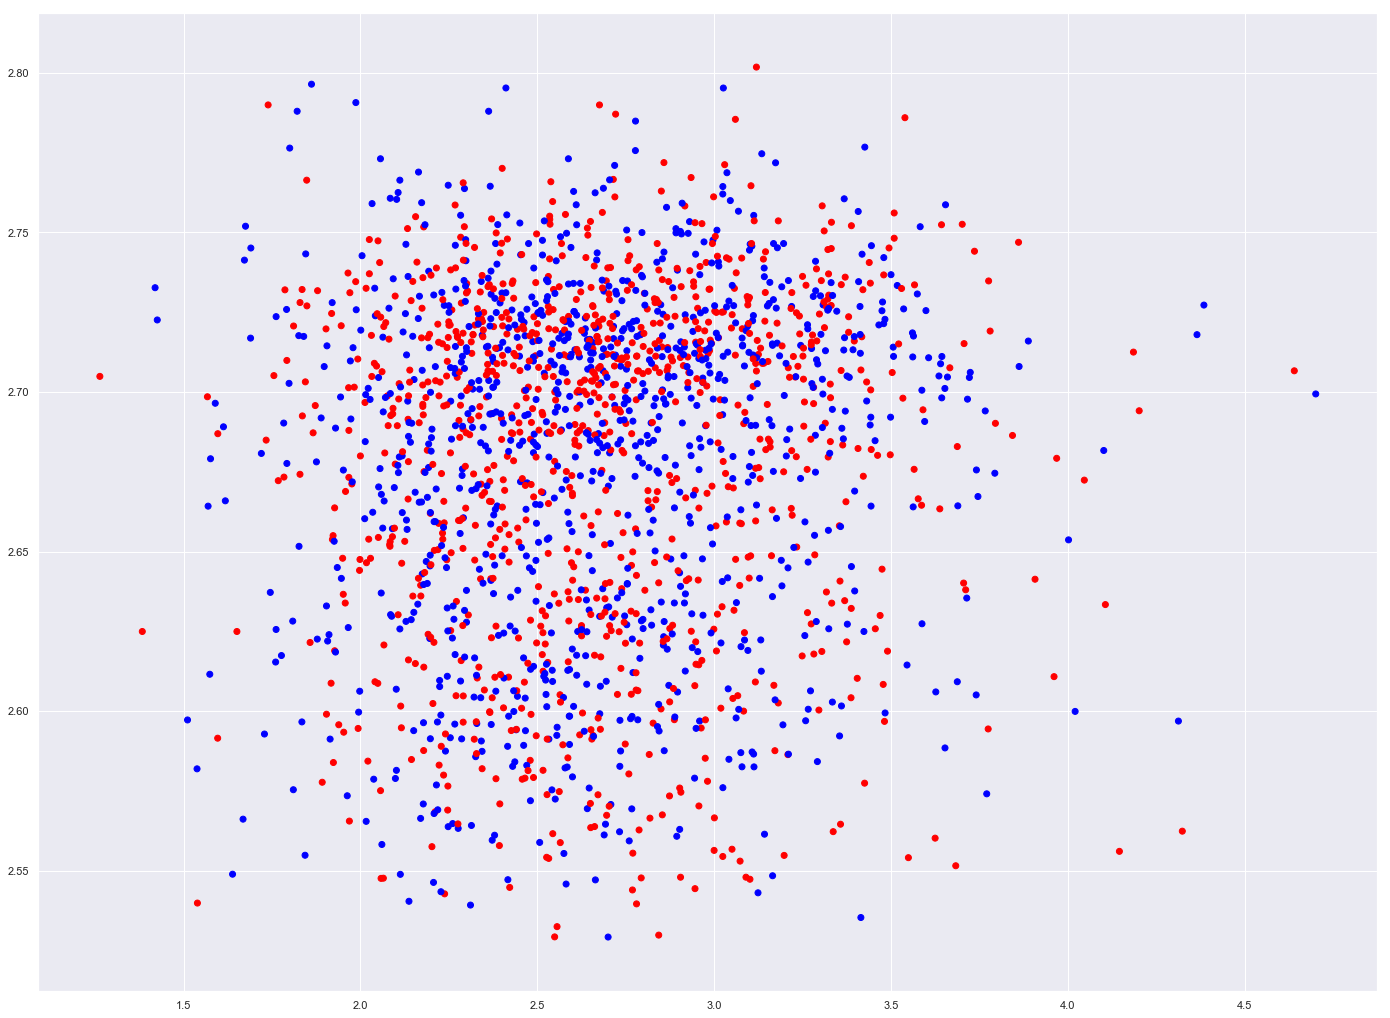

In [85]:
plt.scatter(y_test,predictions,c=['red', 'blue'])

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.371591278188098
MSE: 0.21825334757746806
RMSE: 0.46717592786601075


# Predict Time-Based Values

In [45]:
pred_params.head(3)

Gleitwert  Tunnelbandgeschwindigkeitmean_30_30  \
time                                                                  
2018-01-11 22:44:12   2.569658                             2.798889   
2018-01-11 22:44:12   2.415492                             2.798889   
2018-01-12 14:17:09   2.527775                             3.110000   

                     Druck Silikonmean_30_30  \
time                                           
2018-01-11 22:44:12                 0.424860   
2018-01-11 22:44:12                 0.424860   
2018-01-12 14:17:09                 0.411647   

                     Ist- Temperatur Heissteil 1mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.087515   
2018-01-11 22:44:12                             290.087515   
2018-01-12 14:17:09                             290.319464   

                     Ist- Temperatur Heissteil 2mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.317969   
2018-01-11 22:44:12                             290.317969   
2018-01-12 14:17:09                             290.393500   

                     Ist- Temperatur Heissteil 3mean_30_30  \
time                                                         
2018-01-11 22:44:12                             290.214870   
2018-01-11 22:44:12                             290.214870   
2018-01-12 14:17:09                             290.107099   

                     Druck Sterilluft nach Silikonmean_30_30  
time                                                          
2018-01-11 22:44:12                                 0.074777  
2018-01-11 22:44:12                                 0.074777  
2018-01-12 14:17:09                                 0.182095

**No we will try to predict the december values. As train-data we will use the data from Jannuary - November.**

We will also scale our data!

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [106]:
np.array(jan_nov_target).reshape(-1, 1)

array([[2.56965833],
       [2.41549167],
       [2.527775  ],
       ...,
       [2.9982    ],
       [3.26535   ],
       [2.69866667]])

In [105]:
type(jan_nov_target)

pandas.core.series.Series

In [99]:
# Data from Jan. - Nov. // WITHOUT THE TARGET VALUE
jan_nov_feat = pred_params[pred_params.index < '12-01.2018']
jan_nov_feat.drop('Gleitwert', axis=1, inplace=True)

# Target variable from Jan. - Nov. 
jan_nov_target = pred_params[pred_params.index < '12-01.2018']['Gleitwert']

In [100]:
print(len(jan_nov_feat))
print(len(jan_nov_target))

4834
4834


In [101]:
# Data Dez. // WITHOUT THE TARGET VALUE
dez_feat = pred_params[pred_params.index >= '12-01.2018']
dez_feat.drop('Gleitwert', axis=1, inplace=True)

# Target variable Dez. 
dez_target = pred_params[pred_params.index > '12-01.2018']['Gleitwert']

In [102]:
print(len(dez_feat))
print(len(dez_target))

231
231


In [103]:
print(jan_nov_feat.shape)
print(jan_nov_target.shape)

(4834, 6)
(4834,)


In [121]:
scaler = StandardScaler()
scaler.fit(jan_nov_feat)

scaled_train = scaler.transform(jan_nov_feat)
scaled_test = scaler.transform(dez_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [122]:
#scaled_train

In [123]:
lm = LinearRegression()
lm.fit(scaled_train,jan_nov_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
coeff_df = pd.DataFrame(lm.coef_,jan_nov_feat.columns,columns=['Coefficient'])
coeff_df

Coefficient
Tunnelbandgeschwindigkeitmean_30_30        -0.069442
Druck Silikonmean_30_30                     0.006362
Ist- Temperatur Heissteil 1mean_30_30      -0.020640
Ist- Temperatur Heissteil 2mean_30_30       0.004139
Ist- Temperatur Heissteil 3mean_30_30      -0.004074
Druck Sterilluft nach Silikonmean_30_30     0.031520

In [125]:
predictions = lm.predict(scaled_test)

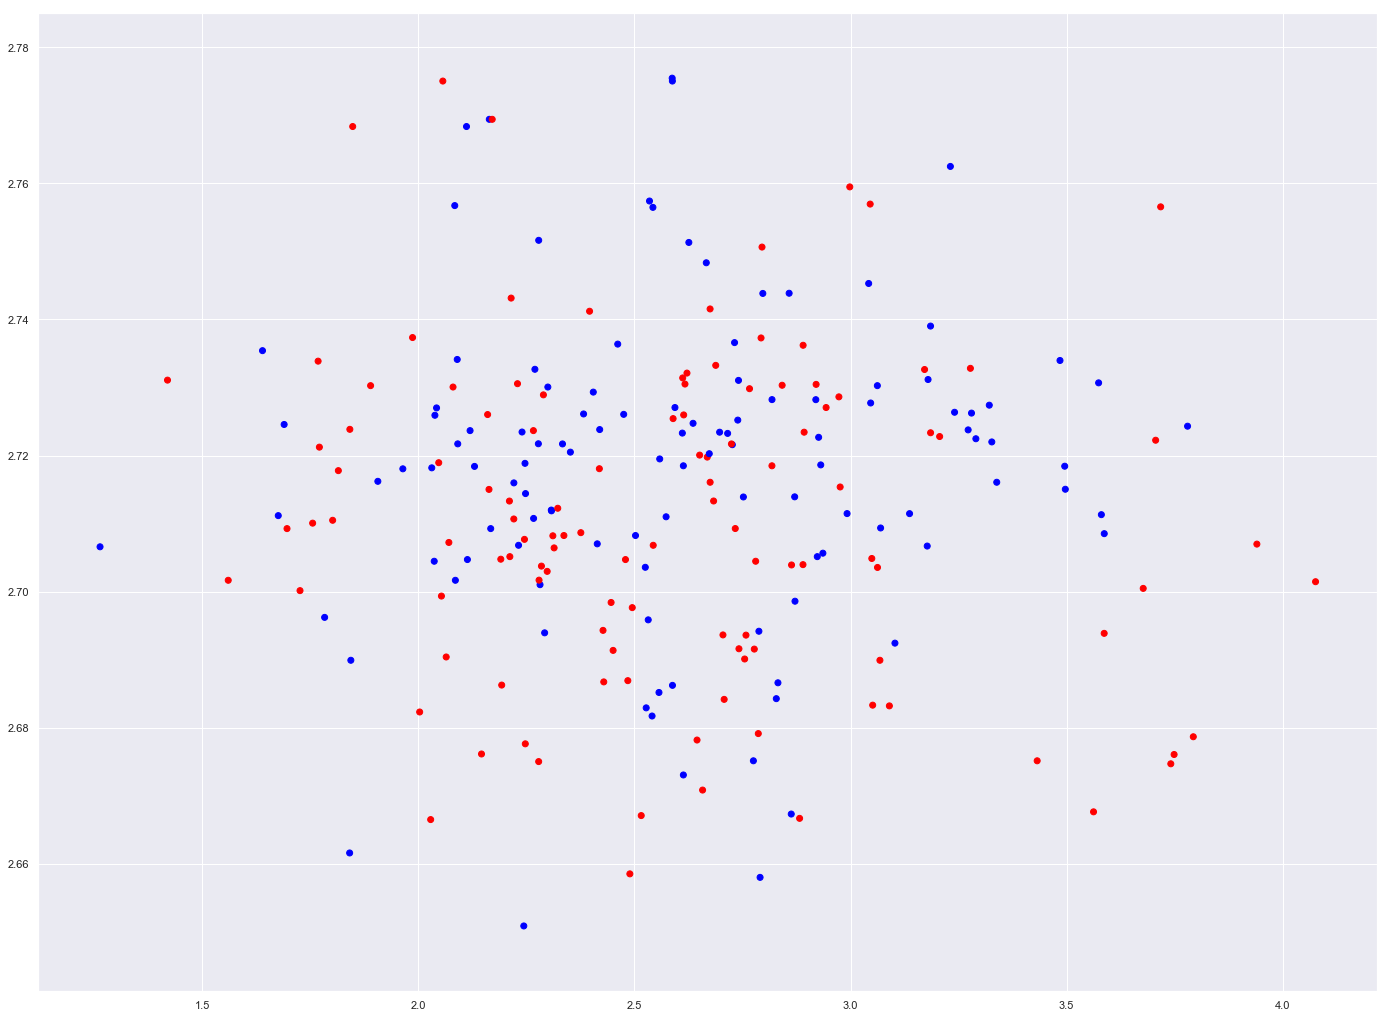

In [126]:
plt.scatter(dez_target,predictions, c=['red', 'blue'])

In [127]:
print('MAE:', metrics.mean_absolute_error(dez_target, predictions))
print('MSE:', metrics.mean_squared_error(dez_target, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dez_target, predictions)))

MAE: 0.4219619646910181
MSE: 0.2783148279271812
RMSE: 0.5275555211796965


------

# DANGER ZONE - DEEP LEARNING KILLS SEVER

------

In [ ]:
len(predict_set)

In [ ]:
last = predict_set[predict_set.index < '12.01.2018'].count()

In [ ]:
last[0]

In [ ]:
len(predict_set)-last[0]

In [ ]:
# Splitting up data
train = df.iloc[:4834]
test = df.iloc[4834:]

In [ ]:
scaler = MinMaxScaler()

# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
# Let's redefine to get 12 months back and then predict the next month out
n_features = 18
n_input = 231
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# Print the first batch
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

**Important:**

We use 18 paramaters - thats why the `TiomeSeries_Generator` returns the shape as displayed above. We use 231 values to predict 1 batch consisting of 18 parameters (one for each column in the `scaled_train` df).

In [ ]:
scaled_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(18))
model.compile(optimizer='adam', loss='mse')

model.summary()

In [ ]:
# fit model with the generator object
model.fit_generator(generator,epochs=50, verbose=0)

In [ ]:
model.history.history.keys()

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)